### EDA and Plots

In [1]:
#import libraries
import pandas as pd


In [3]:
#read csv files into pandas dataframes
df = pd.read_csv('../data/totaldemand_temperature_nsw.csv')
df.head()

,DATETIME,TOTALDEMAND,TEMPERATURE,SEASON,WEEKDAY
0,2010-01-01 00:00:00,8038.00,23.1,Summer,Friday
1,2010-01-01 00:30:00,7809.31,22.9,Summer,Friday
2,2010-01-01 01:00:00,7483.69,22.6,Summer,Friday
3,2010-01-01 01:30:00,7117.23,22.5,Summer,Friday
4,2010-01-01 02:00:00,6812.03,22.5,Summer,Friday


In [4]:
#describe TOTALDEMAND column
df['TOTALDEMAND'].describe()

count    195947.000000
mean       8111.924589
std        1299.171401
min        5074.630000
25%        7149.430000
50%        8052.180000
75%        8956.985000
max       14579.860000
Name: TOTALDEMAND, dtype: float64

In [6]:
#describe TEMPERATURE column
df['TEMPERATURE'].describe()

count    195947.000000
mean         17.530995
std           5.884212
min          -1.300000
25%          13.500000
50%          17.900000
75%          21.500000
max          44.700000
Name: TEMPERATURE, dtype: float64

In [11]:
#maximum temperature in Summer season
df[df['SEASON'] == 'Summer']['TEMPERATURE'].max()


44.7

In [12]:
#average temperature in Summer season
df[df['SEASON'] == 'Summer']['TEMPERATURE'].mean()



22.39546563039039

In [13]:
#show maximum and minimum and average temperature in each season in a table
df.groupby('SEASON')['TEMPERATURE'].agg(['max', 'min', 'mean'])


,max,min,mean
SEASON,,,
Autumn,38.8,1.9,17.803073
Spring,40.4,2.9,17.709702
Summer,44.7,8.9,22.395466
Winter,28.7,-1.3,11.997980


In [14]:
#show maximum and minimum and average demand in each season in a table
df.groupby('SEASON')['TOTALDEMAND'].agg(['max', 'min', 'mean'])


,max,min,mean
SEASON,,,
Autumn,12191.08,5384.58,7904.382291
Spring,12601.82,5221.13,7648.347254
Summer,14579.86,5074.63,8155.079273
Winter,13176.33,5623.02,8738.915025


<Axes: xlabel='SEASON'>

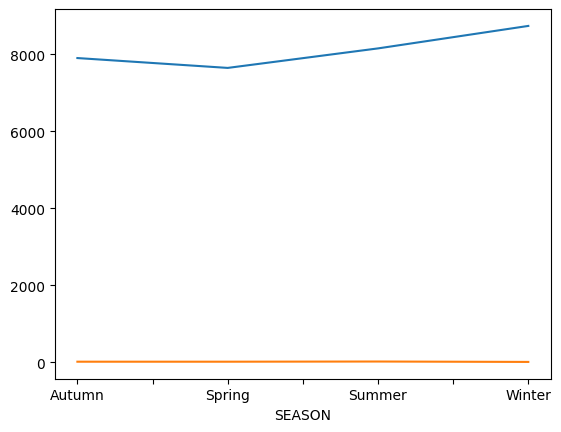

In [15]:
#plot seasonal demand and temperature in a line plot
df.groupby('SEASON')['TOTALDEMAND'].mean().plot()
df.groupby('SEASON')['TEMPERATURE'].mean().plot()


<Axes: >

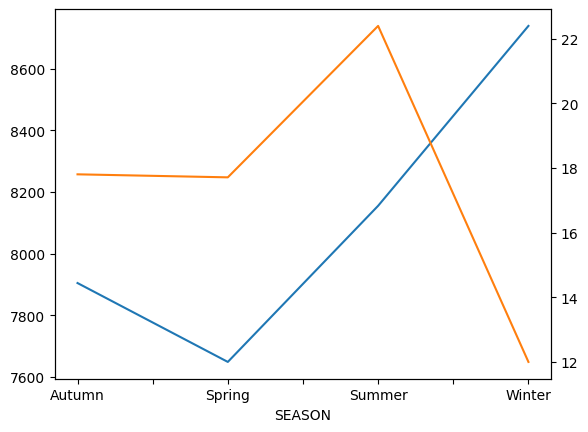

In [16]:
#plot scaled seasonal demand and temperature in a line plot
df.groupby('SEASON')['TOTALDEMAND'].mean().plot()
df.groupby('SEASON')['TEMPERATURE'].mean().plot(secondary_y=True)


<Axes: xlabel='TEMPERATURE', ylabel='TOTALDEMAND'>

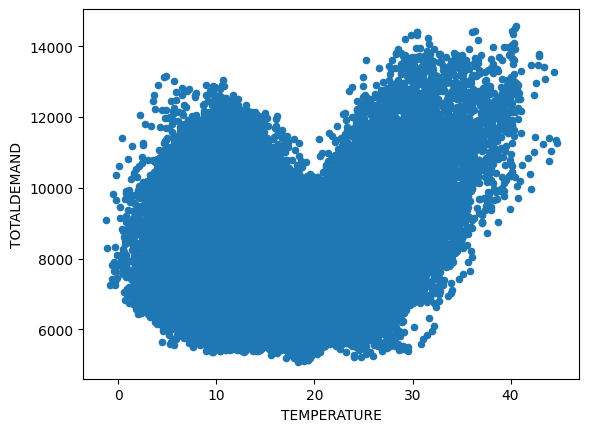

In [18]:
#scatter plot demand vs temperature
df.plot.scatter(x='TEMPERATURE', y='TOTALDEMAND')


<Axes: xlabel='WEEKDAY'>

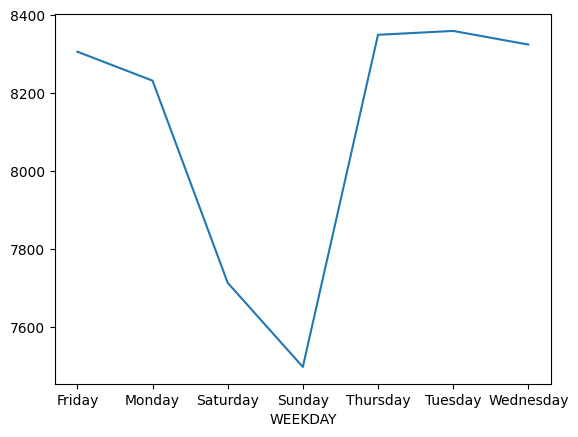

In [19]:
#plot demand in weekdays 
df.groupby('WEEKDAY')['TOTALDEMAND'].mean().plot()


In [26]:
df.dtypes

DATETIME       datetime64[ns]
TOTALDEMAND           float64
TEMPERATURE           float64
SEASON                 object
WEEKDAY                object
dtype: object

In [27]:
#chnage the dateformat of DATETIME 
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df.head()

,DATETIME,TOTALDEMAND,TEMPERATURE,SEASON,WEEKDAY
0,2010-01-01 00:00:00,8038.00,23.1,Summer,Friday
1,2010-01-01 00:30:00,7809.31,22.9,Summer,Friday
2,2010-01-01 01:00:00,7483.69,22.6,Summer,Friday
3,2010-01-01 01:30:00,7117.23,22.5,Summer,Friday
4,2010-01-01 02:00:00,6812.03,22.5,Summer,Friday


In [28]:
df.set_index('DATETIME', inplace=True)
df.head()

,TOTALDEMAND,TEMPERATURE,SEASON,WEEKDAY
DATETIME,,,,
2010-01-01 00:00:00,8038.00,23.1,Summer,Friday
2010-01-01 00:30:00,7809.31,22.9,Summer,Friday
2010-01-01 01:00:00,7483.69,22.6,Summer,Friday
2010-01-01 01:30:00,7117.23,22.5,Summer,Friday
2010-01-01 02:00:00,6812.03,22.5,Summer,Friday


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_86428/766546323.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[df['WEEKDAY'] == 'Friday']['TOTALDEMAND'].resample('H').mean().plot()


<Axes: xlabel='DATETIME'>

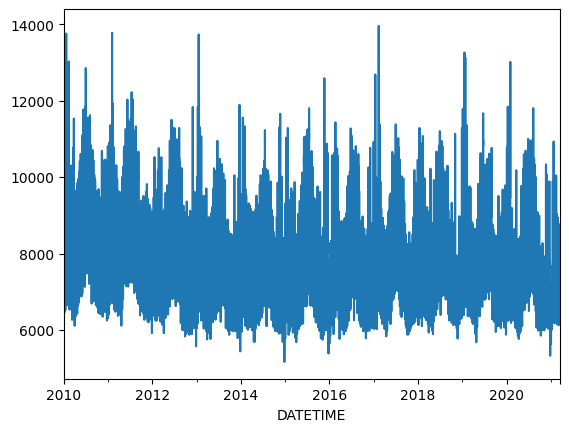

In [31]:
#plot hourly demand for Friday 
df[df['WEEKDAY'] == 'Friday']['TOTALDEMAND'].resample('H').mean().plot()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_86428/1473172023.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[(df['WEEKDAY'] == 'Friday') & (df['SEASON'] == 'Summer') & (df.index.year == 2018)]['TOTALDEMAND'].resample('H').mean().plot()


<Axes: xlabel='DATETIME'>

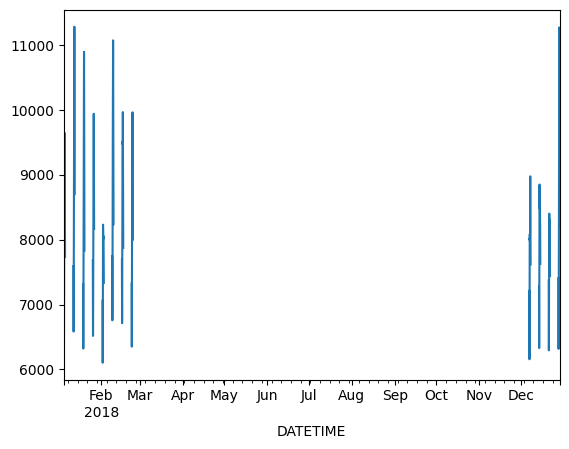

In [36]:
#plot hourly demand for Friday in Summer 2018
df[(df['WEEKDAY'] == 'Friday') & (df['SEASON'] == 'Summer') & (df.index.year == 2018)]['TOTALDEMAND'].resample('H').mean().plot()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_86428/2051223210.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['2018-12':'2019-01']['TOTALDEMAND'].resample('H').mean().plot()


<Axes: xlabel='DATETIME'>

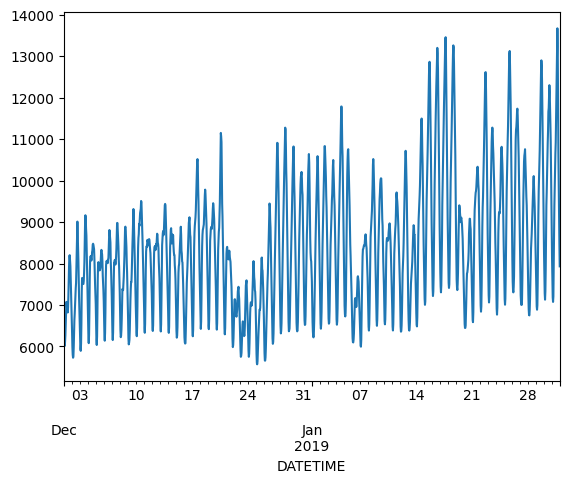

In [40]:
#only plot the line plot of demand in DEC 2018 to JAN 2019
df['2018-12':'2019-01']['TOTALDEMAND'].resample('H').mean().plot()



/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_86428/2107209765.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['2018-12':'2019-02']['TOTALDEMAND'].resample('H').mean().plot()
/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_86428/2107209765.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['2018-12':'2019-02']['TEMPERATURE'].resample('H').mean().plot(secondary_y=True)


<Axes: >

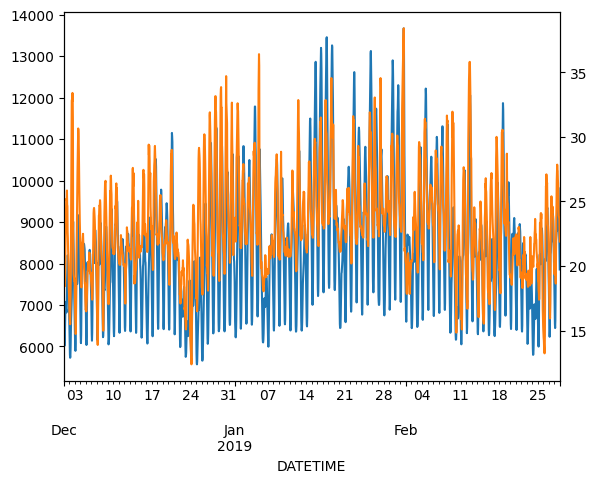

In [52]:
#demand and temperature in DEC 2018 to FEB 2019
df['2018-12':'2019-02']['TOTALDEMAND'].resample('H').mean().plot()
df['2018-12':'2019-02']['TEMPERATURE'].resample('H').mean().plot(secondary_y=True)


<Axes: xlabel='DATETIME'>

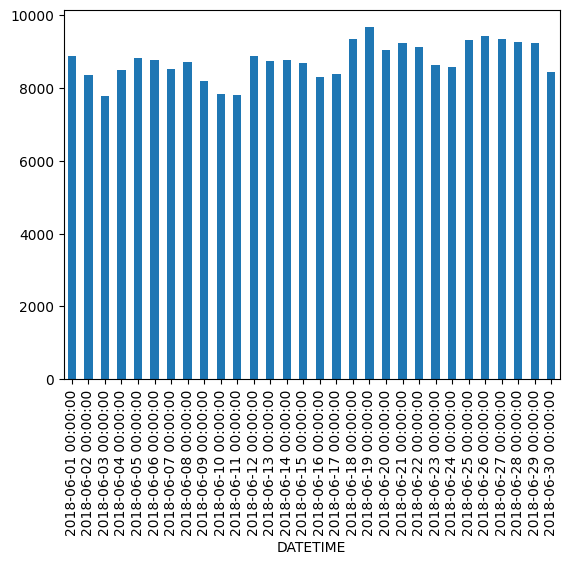

In [46]:
# barplot of demand for DEC 2018 to JAN 2019 
df['2018-06-01':'2018-06-30']['TOTALDEMAND'].resample('D').mean().plot(kind='bar')


<Axes: xlabel='WEEKDAY'>

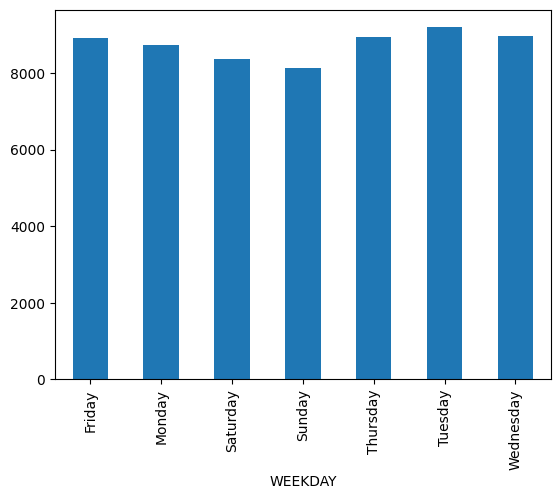

In [51]:
#average demand for weekdays for month June 2018
df['2018-06-01':'2018-06-30'].groupby('WEEKDAY')['TOTALDEMAND'].mean().plot(kind='bar')


